## Why spending two classes on regression and fitting?

## Dictionary:
* bell shape - forma de campana
* match - hacer pareja 
* reach - alcanze(ar) 
* describe - describir
* useful - util
* knowledge -conocimiento
* anticipate - anticipar
* guy - hombre, chico... cosa

### Order of the class
* applications of fitting, example
http://fisica.udea.edu.co:8080/IdealGas
* recap on distribution (gaussian/normal)
* Ideal gas and Maxwell-Boltzmann distribution
* finding temperature of the ideal gas using fitting (scipy.curve_fit)

* in the first class regression we analysed how regression (ajuste) works
* in the second we analysed the error of the regression. We used random numbers to generate the histogram (normal distribution) of this bell shape, we compare two different distributions with different spread, explained what is $\sigma$...
* but the distribution has many "applications" - it represents may physical phenomenas that involves random numbers

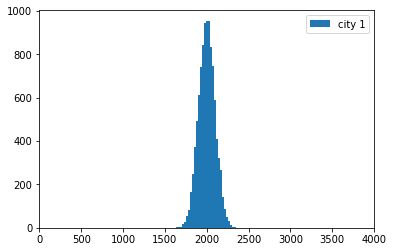

In [1]:
import matplotlib.pyplot as plt
import numpy as np
mu1=2000
sigma1 = 100
s_normal = np.random.normal(mu1, sigma1, 10000)
fig,ax=plt.subplots(1,1)
bins=30
myhist, bin_edges=np.histogram(s_normal,bins=31)
#print(bin_edges)
amp=np.max(myhist)
ax.hist(s_normal,bins=bins,label='city 1')
ax.set_xlim(0,2*mu1)
ax.legend()

* this distribution of random numbers (where one value is more common than other) has name: Gaussian distribution or normal distribution
and there is a corresponding equation to describe it: In the most general form:

Gaussian distribution: $$g(x)=Ae^{-\frac{1}{2} \frac{x^2}{\sigma^2}}$$
or in a different form (for fitting)
$$g(x)=Ae^{-\frac{1}{2} \frac{(x-\bar{x})^2}{\sigma^2}}$$

* A is the amplitude (maximum value of the distribution)
* $x$ is sample
* $\bar{x}$ is the mean value (average)
* $\sigma$ is the spread (width) of the distribution

why there is $(x-\bar{x})$?
if variable $x$ is exactly equal the expected value (mean) the exponens becomes zero and the distribution reaches maximum g=A 

### Lets go back to the histogram
for the histogram (of the salary problem) we used: 

mu1 =2000,

sigma1 = 100,

We can try to reproduce the histogram using the gaussian function:

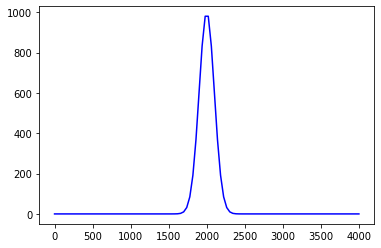

In [24]:
import numpy as np
import matplotlib.pyplot as plt

sigma=100
x_mean=2000
A=1000
x=np.linspace(0,4000,100)
g=A*np.exp(-0.5*(x-x_mean)**2/sigma**2)
fig,ax=plt.subplots(1,1)
ax.plot(x,g,'-b')

lets compare:

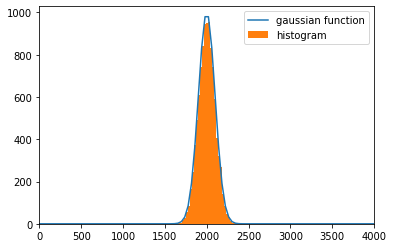

In [25]:
fig,ax=plt.subplots(1,1)
ax.plot(x,g,label='gaussian function')
bins=30
ax.hist(s_normal,bins,label='histogram')
ax.set_xlim(0,2*mu1)
ax.legend()

## How is this useful?
Well, if we know the function describing the process we can do fit the data - make the algorithm to minimize the residulas (sum of its squares) - and reproduce the original curve and hence obtain the parameters of the function here: $A,\mu,\sigma$

So let's reverse the problem, Imagine that you dont know the widht of this histogram. How can you find it?
* we know that this distribution is described by a gaussian function (it is important to know the function that describe the data)
* we can fit it!

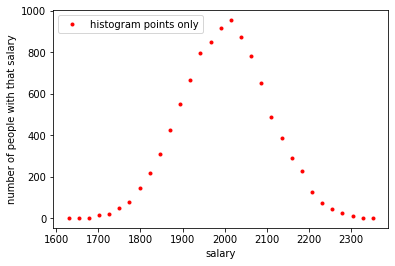

In [26]:
# Just generating points same as on the histogram
myhist, bin_edges=np.histogram(s_normal,bins=31)
x=np.linspace(bin_edges[0],bin_edges[-1],len(myhist))
# plotting the points
fig,ax=plt.subplots(1,1)
ax.plot(x,myhist,'.r',label='histogram points only')
ax.set_xlabel('salary')
ax.set_ylabel('number of people with that salary')
ax.legend()

The distribution has a shape of the gaussian function

Gaussian distribution: $$g(x)=Ae^{-\frac{1}{2} \frac{(x-\bar{x})^2}{\sigma^2}}$$

We can use the curve_fit to adjust parameters in such a way that the original points and generated curve has minimal residuals and hence find: A,$\mu$, $\sigma$ 

In [27]:
from scipy.optimize import curve_fit

def fittingGauss1D(x,A,sigma,mc):
    g = A*np.exp(-(x-mc)**2.0 / (2.0*(sigma**2.0)))
    return g

p0=[500,180,1700]
myhist, bin_edges=np.histogram(s_normal,bins=31)
x=np.linspace(bin_edges[0],bin_edges[-1],len(myhist))
coeffs, matcov = curve_fit(fittingGauss1D, x, myhist, p0,method='lm')
A=np.abs(coeffs[0])
sigma=np.abs(coeffs[1])
mu=np.abs(coeffs[2])
myfit=fittingGauss1D(x,A,sigma,mu)
print('sigma=',sigma)


sigma= 103.67142477250077


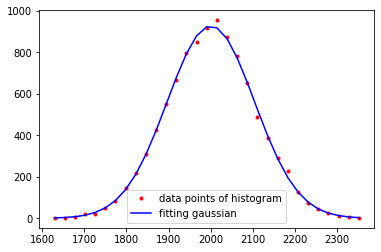

In [17]:
fig,ax=plt.subplots(1,1)
ax.plot(x,myhist,'.r',label='data points of histogram')
ax.plot(x,myfit,'-b',label='fitting gaussian')
ax.legend()

* for this set of paramenters the generated curve and original points (match)

In [28]:
# According to the fitting:
print(sigma)
print(mu)
print(A)

103.67142477250077
2000.4346794953108
926.5492870523018


* finding $\mu$, $\sigma$ can be useful !!

## Ideal gas, velocity distribution of the particles: Maxwell-Boltzmann distribution - real life problem

It is impossible to do
astrophysics without some basic knowledge of the
laws of thermodynamics and statistical physics,
we will anticipate some of the results from later
courses already.

http://fisica.udea.edu.co:8080/IdealGas

Maxwell-Boltzmann velocity distribution in 3 coordinates (3 degrees of freedom) can be written:

$$P(v)=\left(\frac{m}{2\pi k_B T}\right)^{3/2}e^{-\frac{1}{2} \frac{m v^2}{k_B T}}$$

in one direction:

$$P(v)=\left(\frac{m}{2\pi k_B T}\right)^{1/2}e^{-\frac{1}{2} \frac{m v^2}{k_B T}}$$

or

$$P(v)=\sqrt{\frac{m}{2\pi k_B T}}e^{-\frac{1}{2} \frac{m v^2}{k_B T}}$$

(here $k_B$ is Boltmann’s constant) giving the probability that a gas particle with mass m in a gas with temperature T has the velocity v. This is the vector form of the Maxwell Boltzmann distribution. It might not be directly evident that this is a Gaussian distribution.

$$P(v)=\sqrt{\frac{1}{2\pi \sigma^2}}e^{-\frac{1}{2} \frac{v^2}{\sigma^2}}$$

where $\sigma=\sqrt{\frac{k_BT}{m}}$
to get temperature from $\sigma$
$$ T=\frac{m\sigma^2}{k_B}$$


<table><tr>
<td> <img src="imgs/MB_distribution_temp.jpg" width="300" /> </td>
</tr></table>

In practice we deal with the distribution of the number of particles with given velocity (http://fisica.udea.edu.co:8080/IdealGas):

$$f_N=f_{max} e^{-\frac{1}{2} \frac{ v^2}{\sigma^2}}$$




And this can be described by gaussian function:
Gaussian distribution: $$g(x)=Ae^{-\frac{1}{2} \frac{(x-\bar{x})^2}{\sigma^2}}$$

So if we know the distribution, we can do the fit to obtain $\sigma$
and from that the temperatures follows to be: 
$$ T=\frac{m\sigma^2}{k_B}$$

### Example

Lets imagine we have collected the velocities of the atoms from this simulations: http://fisica.udea.edu.co:8080/IdealGas

In [29]:
import pandas as pd

In [33]:
df =pd.read_csv('NvsV.csv',delimiter=',')
df[35:65]
#(this is distribution already - compare with the simulation)

,velocity [m/s],Natoms
35,530.303030,570.305769
36,545.454545,624.456780
37,560.606061,678.311484
38,575.757576,730.950753
39,590.909091,781.410476
40,606.060606,828.709858
41,621.212121,871.882466
42,636.363636,910.008705
43,651.515152,942.248192
44,666.666667,967.870478


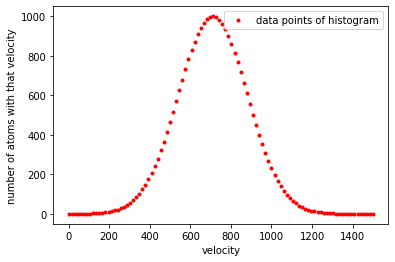

In [35]:
fig,ax=plt.subplots(1,1)
ax.plot(df['velocity [m/s]'],df['Natoms'],'.r',label='data points of histogram')
ax.set_xlabel('velocity')
ax.set_ylabel('number of atoms with that velocity')
ax.legend()

In [37]:
from scipy.optimize import curve_fit

def fittingGauss1D(x,A,sigma,mc):
    g= A*np.exp(-(x-mc)**2.0 / (2.0*(sigma**2.0)))
    return g

p0=[1000,200,700]
coeffs2, matcov2 = curve_fit(fittingGauss1D, df['velocity [m/s]'], df['Natoms'], p0,method='lm')
A=np.abs(coeffs2[0])
sigma=np.abs(coeffs2[1])
mu=np.abs(coeffs2[2])
myfit2=fittingGauss1D(df['velocity [m/s]'],A,sigma,mu)
print(sigma)

169.55824957813172


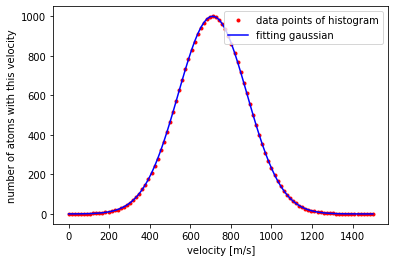

In [38]:
fig,ax=plt.subplots(1,1)
ax.plot(df['velocity [m/s]'],df['Natoms'],'.r',label='data points of histogram')
ax.plot(df['velocity [m/s]'],myfit2,'-b',label='fitting gaussian')
ax.set_xlabel('velocity [m/s]')
ax.set_ylabel('number of atoms with this velocity')
ax.legend()


The temperature can be obtained from the sigma:
$$ T=\frac{m\sigma^2}{k_B}$$

In [39]:
kB=1.38e-23
m=1.44e-25
T=m*sigma**2/kB
print(T,'[K]')

300.00000000000006 [K]


* for the cloud of atoms having those velocities ~ 500m/s and with this spread the temperature is ~ 300K